In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

data_table = pd.read_csv('https://docs.google.com/uc?id=12k0lvO7ZoQf_wv7nGemIAqzOHtFCxI1e&export=download')
print(data_table)

             from             to
0              iu       G-DRAGON
1       epik high             iu
2       epik high         ohhyuk
3              iu         ohhyuk
4           HIGH4             iu
5       epik high           MINO
6       epik high  simon dominic
7       epik high     The quiett
8       epik high         suhyun
9            MINO  simon dominic
10           MINO     The quiett
11  simon dominic     The quiett


#### 강의노트 featuring.csv사용

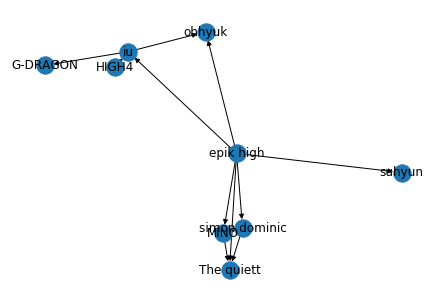

In [3]:
g = nx.from_pandas_edgelist(data_table, 'from', 'to', create_using = nx.DiGraph())
nx.draw(g, with_labels=True)

#### 추가적인 데이터(본인 데이터 사용)

In [30]:
data_table1 = pd.read_csv('https://docs.google.com/uc?id=1nkzL83fHJ_AOv9s8MVahEbBcTsXRLUjZ&export=download')
print(data_table1)

             from             to   total
0      Dasan Hall     Nam Jegwan    3500
1      Dasan Hall            Gym     205
2      Dasan Hall    Hong Jegwan      30
3      Dasan Hall  ajou-hospital      90
4      Dasan Hall     Paldalgwan     110
5      Dasan Hall   Yong Ji Kwan      13
6    Yong Ji Kwan            Gym      60
7    Yong Ji Kwan    Hong Jegwan      30
8    Yong Ji Kwan     Paldalgwan     300
9    Yong Ji Kwan  ajou-hospital      90
10  ajou-hospital     Nam Jegwan      80
11  ajou-hospital            Gym      30
12  ajou-hospital    Hong Jegwan     220
13  ajou-hospital     Paldalgwan      10
14  ajou-hospital   Yong Ji Kwan     399
15            Gym    Hong Jegwan  300000
16            Gym  ajou-hospital      10
17            Gym     Paldalgwan      70
18            Gym   Yong Ji Kwan      79
19     Nam Jegwan            Gym       9
20     Nam Jegwan    Hong Jegwan     300
21     Nam Jegwan  ajou-hospital       1
22     Nam Jegwan     Paldalgwan    8000
23     Nam Jegwa

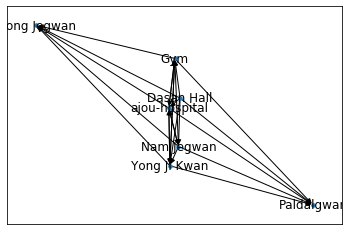

In [46]:
gg = nx.from_pandas_edgelist(data_table1,source='from',target='to',edge_attr='total',create_using=nx.DiGraph())
nx.draw_networkx(gg,node_size=12)

#### 인터넷 예제

In [38]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

In [39]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


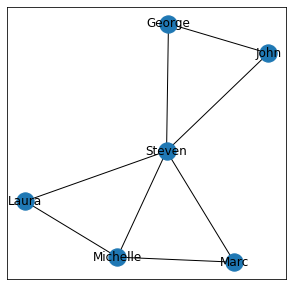

In [40]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric);

In [41]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

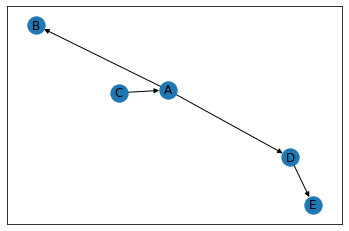

In [42]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

In [43]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

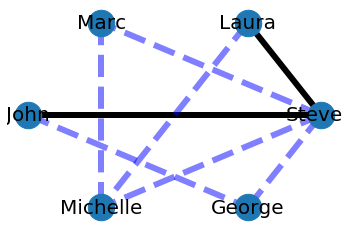

In [44]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();